# Desafío - Inferencia de tópicos con EM
- Para realizar este desafío debes haber estudiado previamente todo el material disponibilizado correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo desafío:
    - El desafío se debe desarrollar de manera Individual.
    - Para la realización del desafío necesitarás apoyarte del archivo Apoyo Desafío - Inferencia de tópicos con EM.

## Requerimientos
- En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta `dump`.
- Cada `csv` tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
- En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical (tópico inferido) más probable dado la letra de una canción.
- Para ello implementaremos un modelo conocido como **Latent Dirichlet Allocation**, que hace uso de una variante del algoritmo EM para inferir tópicos latentes a partir de una matriz de documentos.

### Ejercicio 1: Preparar el ambiente de trabajo
- Importe los módulos `numpy`, `pandas`, `matplotlib`, `seaborn`, `glob` y `os` siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta `dump`.
- Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando `glob.glob` y `os.getcwd()` para extraer las rutas absolutas.
- Posteriormente genere un objeto `pd.DataFrame` que contenga todos los `csv`.
- Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

**Tip**: Puede replicar lo revisado en el desafío de Naive Bayes para este paso.

In [1]:
# Utiliza esta celda para importar los módulos solicitados

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Utiliza esta celda para generar el DataFrame de letras de canciones solicitado

archivos = glob.glob('dump/*.csv')

df_all = pd.DataFrame()
for arc in archivos:
    df = pd.read_csv(arc)
    df_all = df_all.append(df)

df_all = df_all.drop(columns = 'Unnamed: 0').reset_index(drop=True)
df_all.columns = ['artista', 'genero', 'cancion', 'letra']
df_all

,artista,genero,cancion,letra
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...
...,...,...,...,...
9484,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
9485,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
9486,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
9487,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...


### Ejercicio 2: Matriz de ocurrencias
- Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería `sklearn`.
- Aplique la clase para extraer las 5000 palabras más repetidas en toda la base de datos.
- Con la clase inicializada, incorpore las letras con el método `fit_transform` y guarde los resultados en un nuevo objeto.

**Tip**: Puede basarse en lo implementado en el desafío de Naive Bayes para este paso

In [3]:
# Utiliza est celda para crear la bolsa de palabras

from sklearn.feature_extraction.text import CountVectorizer

# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english', max_features=5000)

# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df_all["letra"])

# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()

# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

# creamos el indice de la matriz de ocurrencias
cancion = [f'Cancion_{i+1}' for i in range(count_vectorizer_fit.shape[0])]

# creamos la matriz de ocurrencias
df_matriz_ocurrencia = pd.DataFrame(data=count_vectorizer_fit.toarray(), index=cancion, columns=words)
df_matriz_ocurrencia

,000,10,100,11,12,15,16,18,20,2000,...,yuh,yup,zero,zip,zombie,zombies,zone,zoo,zoom,zulu
Cancion_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancion_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancion_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancion_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancion_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cancion_9485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancion_9486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Cancion_9487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cancion_9488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Palabra,Frecuencia
2483,like,19629
1241,don,17398
2362,know,14962
1847,got,14171
2299,just,13978
...,...,...
3375,ra,31
2666,mattress,31
3796,shakes,31
2646,martyr,31


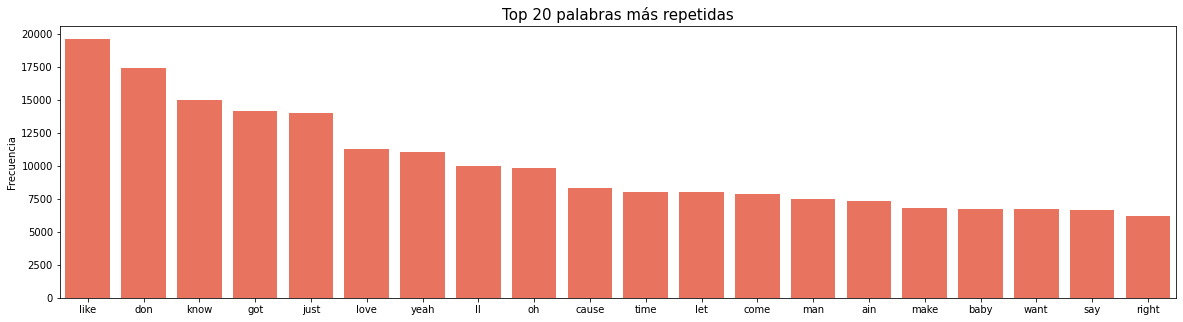

In [4]:
# creamos el DataFrame resumido para facilitar la visualización

# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

# Se crea un DataFrame para facilitar la visualización
words_freq_df = pd.DataFrame([words, words_freq]).T.sort_values(by=[1], ascending=False)
words_freq_df.columns = ["Palabra", "Frecuencia"]
display(words_freq_df)

plt.figure(figsize=(20,5))
sns.barplot(y=words_freq_df['Frecuencia'].head(20), x=words_freq_df['Palabra'].head(20), color='Tomato')
plt.xlabel('')
plt.title('Top 20 palabras más repetidas', fontsize=15);

**Comentarios: Se puede ver que las palabras más frecuentes son `like`, `don` (la cual proviene de la plabra `don't`) y `know`**

### Ejercicio 3: Entrenamiento del Modelo
- Importe `sklearn.decomposition.LatentDirichletAllocation` y `sklearn.model_selection.GridSearchCV`.
- Genere una búsqueda de grilla con los siguientes hiper parámetros:
    - `n_components`: [5, 10, 15].
    - `learning_decay`: [0.7, 0.5].
- Entrene la búsqueda de grilla con las letras en un formato vectorizado con `CountVectorizer`.
- Reporte brevemente cuál es la mejor combinación de hiper parámetros.
    
**Nota**: Para este ejercicio no es necesario implementar pipeline, ya que solo se busca encontrar los tópicos latentes en los datos entregados, sin hacer predicciones futuras. Por tanto, solo se tiene 1 paso, que es el modelo LDA, y se le puede asignar directamente en el fit la bolsa de palabras generada en el paso anterior. De todas formas, si desea implementar un Pipeline, también es posible.

### Digresión: Latent Dirichlet Allocation
Latent Dirichlet Allocatio (LDA) es un modelo probabilístico generativo basado en Inferencia Variacional EM. La principal utilidad de esto es la identificación de tópicos en un corpus de texto. El proceso de inferencia se puede resumir en los siguientes pasos:
- Cada documento dentro del corpus se puede entender como una mezcla de tópicos comunes a nivel de corpus.
- Esta mezcla de tópicos es latente: sólo observamos los documentos registrados y sus palabras.

La API de `sklearn.decomposition.LatentDirichletAllocation` presenta la misma funcionalidad de todo modelo de sklearn. Algunos puntos a considerar en la inicialización de la clase son:
- `n_components`: Cantidad de tópicos a inferir en un corpus.
- `learning_method`: Forma en la que entran los datos en entrenamiento. Cuando es 'batch', se ingresa la matriz de entrenamiento completa. Cuando es 'online', la matriz de entrenamiento ingresa de manera secuencial en parcelas pequeñas.
- `learning_decay`: Tasa de aprendizaje en la función de pérdida. Cuando se implementa con `learning_method='online'`, el modelo se entrena con Gradiente Estocástico Descendente.
- **Perplejidad**: Busca aproximar el número óptimo de tópicos a inferir. Técnicamente evalúa qué tan bien predice una muestra específica. En función a un número de tópicos, define la distribución teórica de palabras representada por los tópicos y la compara con la ocurrencia empírica de palabras en tópicos.

In [5]:
# Utiliza esta celda para definir la grilla de parámetros

from sklearn.decomposition import  LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

hiper_params = {'n_components': [5, 10, 15],
                'learning_decay': [0.7, 0,5]}

In [83]:
# Utiliza esta celda para instanciar y entrenar el objeto GridSearchCV (usar las validacions cruzadas por defecto)
#    - Como primer parámetro recibe una instancia de LatentDirichletAllocation(learning_method="online")
#    - Como segundo parámetro recibe param_grid=search_params (grilla de parámetros creada en la celda anterior)
#    - Concatenar el método fit que recibe como argumento la bolsa de palabras creada en el ejercicio 2

modelo = LatentDirichletAllocation(learning_method="online", random_state=13)
lda_grid = GridSearchCV(modelo, param_grid=hiper_params)
lda_grid.fit(df_matriz_ocurrencia)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 random_state=13),
             param_grid={'learning_decay': [0.7, 0, 5],
                         'n_components': [5, 10, 15]})

In [86]:
# Utiliza esta celda para reportar los mejores parámetros obtenidos de la búsqueda de grilla, el mejor puntaje, y la perplejidad del mejor modelo.
# En este caso, el puntaje entregado por la grilla entrenada es la log verosimilitud
# La perplejidad del mejor modelo se puede obtener con: grilla_entrenada.best_estimator_.perplexity(bolsa_de_palabras)

print(f'Mejores parámetros obtenidos: {lda_grid.best_params_}')
print(f'Mejor puntaje obtenido: {lda_grid.best_score_:.2f}')
print(f'Perplejidad del mejor modelo: {lda_grid.best_estimator_.perplexity(df_matriz_ocurrencia):.2f}')

Mejores parámetros obtenidos: {'learning_decay': 0.7, 'n_components': 5}
Mejor puntaje obtenido: -1850233.82
Perplejidad del mejor modelo: 1215.07


### Ejercicio 4: Inferencia e Identificación de Tópicos
- En base a la mejor combinación de hiper parámetros, entrene el modelo con la matriz de atributos de las letras.
- Para identificar de qué se trata cada tópico, necesitamos identificar las principales 15 palabras asociadas con éste. Puede implementar la siguiente línea de código para identificar las principales palabras en un tópico:
```python
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print(f"tópico: {topic_id + 1}")
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([
        counter.get_feature_names()[i]
        for i in topic_name.argsort()[:-15 - 1: -1]
    ]))
```
- Comente a qué tópicos está asociada cada clase inferida

In [104]:
# Utiliza esta celda para implementar el loop del enunciado

fit_best_lda = lda_grid.best_estimator_

for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print(f"tópico: {topic_id + 1}")
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
like got shit ain yo don nigga man fuck em know cause ya niggas yeah
tópico: 2
don just know ll ve time love say way like want cause life make feel
tópico: 3
god life die death dead blood soul hell war kill world pain end alive eyes
tópico: 4
oh yeah love baby got let come gonna hey know ooh girl don wanna ah
tópico: 5
night man light day like sun black away home sky world come eyes song old


**Comentarios**
- El tópico 1 tiene palabras que se pueden asociar a un humor depresivo
- El tópico 2 es más positivo
- El tópico 3 no entrega mucha información
- El tópico 4 está asociado a vocabulario más coloquial, y que se podría asociar a rap o hiphop.

### Ejercicio 5: Identificación de probabilidades
- En base a la información generada, es posible identificar cuales van a ser los géneros más probables de ocurrir para un artista.
- Para ello necesitamos guardar la probabilidad de cada canción en nuestra base de datos original. Podemos implementar esto de la siguiente manera:
```python
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda.transform(transformed_feats)
# esta transformación la podemos coaccionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
    np.round(fit_best_lda, 3), # pasamos esta matriz y la redondeamos en 3 decimales
    index=df_lyrics.index      # agregamos un índice
)
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(
    lambda x: "T: {}".format(x),
    range(1, best_lda.n_components + 1)
))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df_lyrics, topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos; Corresponde al tópico con mayor probabilidad de pertenencia
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1
```
- Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos.
- Comente brevemente cuales son las principales asociaciones existentes.
- Con esta nueva base de datos, identifica las probabilidades de pertenencia para un artista específico.

In [105]:
# Utiliza esta celda para implementar el código del enunciado

# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = fit_best_lda.transform(df_matriz_ocurrencia)
# esta transformación la podemos coaccionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
    np.round(fit_best_lda, 3), # pasamos esta matriz y la redondeamos en 3 decimales
    index=df_all.index      # agregamos un índice
)
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(
    lambda x: "Topic_{}".format(x),
    range(1, lda_grid.best_estimator_.n_components + 1)
))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df_all, topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos; Corresponde al tópico con mayor probabilidad de pertenencia
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1

concatenated_df

,artista,genero,cancion,letra,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,highest_topic
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee...",0.006,0.006,0.566,0.129,0.294,3
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...,0.108,0.005,0.231,0.239,0.417,5
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...,0.002,0.277,0.002,0.172,0.547,5
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...,0.111,0.003,0.302,0.474,0.111,4
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...,0.003,0.230,0.601,0.003,0.163,3
...,...,...,...,...,...,...,...,...,...,...
9484,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n...",0.003,0.100,0.335,0.003,0.560,5
9485,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...,0.049,0.337,0.003,0.609,0.003,4
9486,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...,0.005,0.465,0.005,0.005,0.520,5
9487,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...,0.198,0.519,0.010,0.263,0.010,2


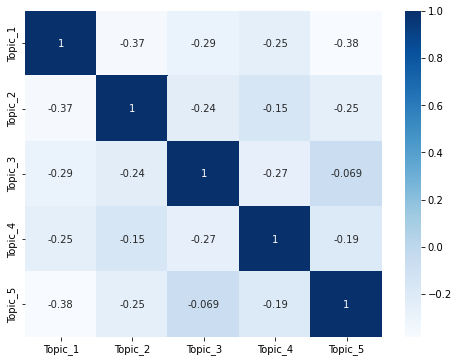

In [100]:
# Utiliza esta celda para generar la matriz de correlaciones solicitada
plt.figure(figsize=(8,6))
sns.heatmap(concatenated_df.drop(['letra','highest_topic'], axis=1).corr(), cmap='Blues', annot=True);

**Comentarios: Claramente, podemos apreciar que entre los topicos generados, no existe relacion o asociacion alguna, lo cuál esta bien ya que lo que busca el generar topicos es que distintos entre sí**

In [123]:
# Utiliza esta celda para identificar las probabilidades de pertenencia de un artista específico (a gusto personal)

df_queen = concatenated_df[concatenated_df['artista']=='Queen'].groupby(['artista','highest_topic'], as_index=False)['genero'].count().rename(columns={'genero': 'count'})
df_queen['prob'] = df_queen['count']/df_queen['count'].sum()
df_queen

,artista,highest_topic,count,prob
0,Queen,1,5,0.026596
1,Queen,2,78,0.414894
2,Queen,3,13,0.069149
3,Queen,4,61,0.324468
4,Queen,5,31,0.164894


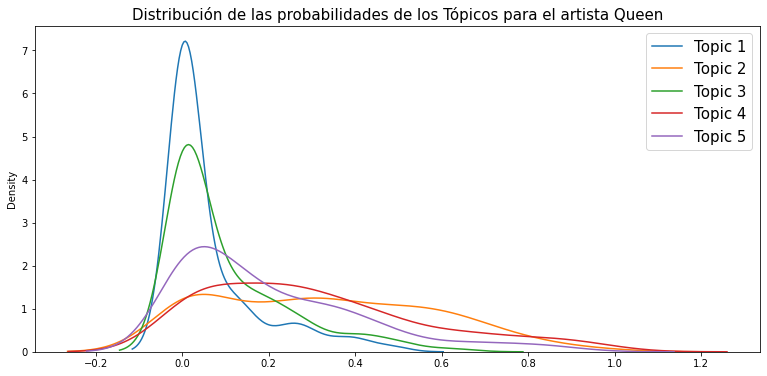

In [179]:
# Utiliza est acelda para graficar la distribución de las probabilidades para algún artista específico (a gusto personal)

df_queen2 = concatenated_df[concatenated_df['artista']=='Queen']

plt.figure(figsize=(13,6))

for i in range(1,6):
    sns.distplot(df_queen2[f'Topic_{i}'], hist = False, kde = True, label=f'Topic {i}')
    plt.xlabel('')

plt.title('Distribución de las probabilidades de los Tópicos para el artista Queen', fontsize=15)
plt.legend(fontsize=15);

**Comentarios: En nuesstro caso, se escogió a queen como artista, donde podemos decitr lo siguiente:**
- Se aprecia que el artista `Queen` está mas asociado al topico 2 que a los demás
- en cuanto a las probabilidades de pertenencia para cada una de las canciones, se pueve ver que este posse las mayores probabilidades para el tópico 2 y 4